### Importing Needed Modules

In [129]:
#importing all needed modules 
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency
import miceforest as mf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from collections import Counter


### Loading the data

In [3]:
#loading the data 
datatab = pd.read_csv('apms07arch.tab', sep='\t')
datatab.to_csv('my_tab_file.csv', index=False)
datacsv = pd.read_csv('my_tab_file.csv')

#uppercase column names 
datacsv.columns = datacsv.columns.str.upper() 

In [5]:
#selecting only the variables that will be used 
dataset1 = pd.DataFrame()

columns = [
    "WT_INTS1", "DVHSIZE", "NUMADULT", "NUMCHILD", "SEPBED", "RESAGE", "YEARJBL", "PTWKHOUR", "DVLASTWK", "HRSWEEK",
    "MCCLEM", "EQVINC", "DVPRAC", "BMI", "DVEAT", "DVA9", "DVB10", "DVC9", "DVD11", "DVE11", "DVF8", "DVG11", "DVH11",
    "DVI4", "DVI11", "DVJ4", "DVJ12", "DVK1", "DVL8", "DVM9", "DVN9", "DVTOTSC", "DVADHD1", "DVADHD3", "ST2BDSC", "DVCSCRE",
    "DVASCRE", "DVTOTAL", "PTSDRE", "PTSDAR", "PTSDCOM", "CIGWEEK", "DVAUDIT1", "SADQCSC", "CANNDPSC", "AMPHDPSC",
    "CRACDPSC", "COCADPSC", "ECSTDPSC", "HEMEDPSC", "TRANDPSC", "GLUEDPSC", "DSMSC", "NOCHILD", "VBAAGE", "VBBAGE", "VBCAGE", 
    "PRIMGRP", "IQVBEST2", "TEN1", "LLORD", "NEWTEN", "HHDTYPE", "RESMARDF", "EDQUAL5", "JBREAS", "LOOKED", "YINACT", 
    "DVILO3A", "DVILO4A", "NOTWK", "HRSWORK", "SOC2000B", "NSSEC", "NSSECR", "SEG", "SC", "SIC2003B", "HRPSOC2B", "ETHNIC5", 
    "ETHNIC4", "WHATREL", "GOR06", "TRTMENT", "DRUGDEP2", "YNOTBOTH", "MAORPA", "SEXORI", "SEXPART", "SEXDES", "SEXPART2",
    "FURN", "BUILT", "GLAZE", "AGE10YR", "AGE20YR", "AGEYNG", "EMPNO", "SENO", "RSTRONG", "IMPPRAC", "PRAYNUM", "EQVINC3", 
    "EQVINC5", "QIMD", "SF1", "SF21", "SF31", "SF8", "SF9", "SF10", "SF11", "FULLIFE", "WORN", "TIRED", "SF12", "HAPPY", 
    "CONHOMD", "CARE2", "CARE3", "CARE4", "CARE5", "BMIGP4", "BMIGP6", "CISRTWO", "CISRFOUR", "CISRSIX", "CISRSEVN", "DIAG", 
    "SYMP1", "SYMP2", "SYMP3", "SYMP4", "SYMP5", "SYMP6", "SYMP7", "SYMP8", "SYMP9", "SYMP10", "SYMP11", "SYMP12", "SYMP13", 
    "SYMP14", "NUMDIS", "DVADHD2", "DVADHD4", "B90", "B91", "B92", "B96", "B97", "B99", "B100", "B101", "B104", "ANTIA1", 
    "ANTIA2", "ANTIA3", "ANTIA4", "ANTIA5", "ANTIA6", "ANTIA7", "AUDITGP", "SADQGP", "AUDSAD2", "AUDSAD3", "HWLONG", "BELONG", 
    "TRUST", "ENJOY", "REALHME", "SAFE", "MOVE", "RESIDENT", "LITTER", "GRAFFIT", "PROPCLOS", "GREEN", "COMGRP", "NSCHOOL", 
    "LEISURE", "GOLIBRAR", "ERI1", "ERI2", "ERI3", "ERI4", "ERI5", "ERI6", "ERI7", "ERI8A", "ERI8B", "ERI8C", "ERI9", "ERI10", 
    "ERI11", "ERI12", "ERI13", "ERI14", "ERI15", "JCQ1", "JCQ2", "JCQ3", "JCQ4", "JCQ5", "JCQ6", "SFQA", "SFQB", "SFQC", 
    "SFQD", "SFQE", "SFQF", "SFQG", "SFQH", "DLSS1", "DLSS2", "DLSS3", "DLSS4", "DLSS5", "DLSS6", "DLSS7", "IQVB2GP", 
    "IQVBEST2G", "IQVBEST3G", "DSMSCGR", "TIED", "MOULD", "MOULX1", "MOULX2", "MOULX3", "MOULX4", "MOULX5", "MOULX6", 
    "TYPHEAT1", "TYPHEAT2", "TYPHEAT3", "TYPHEAT4", "TYPHEAT5", "TYPHEAT6", "TYPHEAT7", "CENTRAL1", "CENTRAL2", "CENTRAL3", 
    "CENTRAL4", "CENTRAL5", "CENTRAL6", "CENTRAL7", "PORTAB1", "PORTAB2", "PORTAB3", "PORTAB4", "USEHEAT1", "USEHEAT2", 
    "USEHEAT3", "USEHEAT4", "USEHEAT5", "USEHEAT6", "USEHEAT7", "HMWARM", "PARTWARM", "PARTWAR2", "PARTWAR3", "PARTWAR4", 
    "PARTWAR5", "PARTWAR6", "PARTWAR7", "FRIENDW", "USEDLESS", "USEDLES2", "USEDLES3", "USEDLES4", "DISCON1", "DISCON2", 
    "DISCON3", "DISCON4", "TENURE", "RESSEX", "WRKING", "SCHEMEET", "JBAWAY", "OWNBUS", "RELBUS", "STARTJ", "EVERWK", "STAT", 
    "MANAGE", "SOLO", "FTPTWK", "WKSHEL1", "WKSHEL2", "WKSHEL3", "LOOKNOW", "LOOKATAL", "LOOKNOT1", "LOOKNOT2", "LOOKNOT3", 
    "LOOKSTOP", "LOOKSTO2", "LOOKSTO3", "DIFFJOB", "SPECREL", "RELIG1", "RELIG2", "RELIG3", "SF2", "SF3", "SF4", "SF5", "SF6", 
    "SF7", "CARE1", "HDOCT", "HDOCT2", "HDOCT3", "HDOCT4", "HDOCT5", "HDOCT6", "HDOCT7", "HDOCT8", "HDOCT9", "HDOCT10", 
    "HDOCT11", "HDOCT12", "HDOCT13", "HDOCT14", "HDOCT15", "HDOCT16", "HDOCT17", "HDOCT18", "HDOCT19", "HDOCT20", "HDOCT21", 
    "HDOCT22", "HDOCT23", "MEDIW201", "MEDIW202", "MEDIW203", "MEDIW204", "MEDIW205", "MEDIW206", "MEDIW207", "MEDIW208", 
    "MEDIW209", "MEDIW210", "MEDIW211", "MEDIW212", "MEDIW213", "MEDIW31", "MEDIW32", "MEDIW33", "MEDIW34", "MEDIW35", 
    "MEDIW36", "LARGACTIL", "STELAZINE", "HALDOL", "RISPERDAL", "ZYPREXA", "CLOZARIL", "PRIADEL", "DOLMATIL", "SEROQUEL", 
    "ABILIFY", "PROZAC", "LUSTRAL", "SEROXAT", "EFEXOR", "NARDIL", "MANERIX", "TRYPTIZOL", "TOFRANIL", "ANAFRANIL", "PROTHIAD", 
    "SINEQUAN", "CIPRAMIL", "ZISPEN", "VALIUM", "ATIVAN", "LIBRIUM", "PLANPAK", "MOGADON", "BUSPAR", "RITALIN", "STRATTERA", 
    "INJDEP", "INJMOD", "INJHALD", "INJCLOP", "INJRISP", "MEDPSYC", "MEDDEP", "MEDHYP", "MEDANX", "MEDADHD", "PSYCTHER", 
    "COGTHER", "ARTTHER", "SOCTRAIN", "MARITHER", "SEXTHER", "COUNSEL", "OTHTHER", "ANYTHER", "INQTRPHY", "INQTRMEN", 
    "OUTQTRPH", "OUTQTRME", "DAYCOMYR", "PSYTRTYR", "PSYLGTYR", "CPNYR", "CLDNYR", "OTHNSEYR", "SCOFF2", "EDIMPACT", 
    "SOCWRKYR", "SFHELPYR", "HMHELPYR", "OREACHYR", "ANYCCAR", "ANYHLCA", "ANYDACA", "ANYMED", "DOC2WKS", "ANYCDAR", 
    "F3200", "F3201", "F3210", "F3211", "SEVDEP", "F4000", "F4001", "SOCPHOB", "SPECPHOB", "PANIC", "GAD", "MADD", "OCD", 
    "PHOB", "AGORA", "MILDDEP", "DEP", "MODDEP", "NEUROTIC", "NOSYMP", "NONEUROT", "SUIHFRI", "SUIHHOS", "SUIHCOM", 
    "SUIHHEL", "SUIHOTH", "SUICTHLF", "SUICATLF", "PSYCPROB", "ST2BD", "DVADIS", "DVASDIS", "DVCDIS", "DVAS8", "DVAS10", 
    "MAJORT16", "PTSDPOS", "SMOKER", "CIGWKGP", "DRNKPROB", "CANNEVER", "CANNDEP", "CANNDEP2", 
    "AMPHEVER", "AMPHDEP", "COCAEVER", "COCADEP", "CRACEVER", "CRACDEP", "ECSTEVER", "ECSTDEP", "HEROEVER", "ACIDEVER", 
    "MUSHEVER", "METHEVER", "HEMEDEP", "TRANEVER", "TRANDEP", "AMYLEVER", "ANABEVER", "GLUEEVER", "GLUEDEP", "DRUGEVER", 
    "DRUGDEP", "DSM1", "DSM2", "DSM3", "DSM4", "DSM5", "DSM6", "DSM7", "DSM8", "DSM9", "DSM10", "DSMPROB", "DSMPATH", 
    "NEVREL", "CLUBS1", "CLUBS2", "CLUBS3", "CLUBS4", "CLUBS5", "CLUBS6", "CLUBS7", "CLUBS8", "CLUBS9", "CLUBS10", 
    "NOCLUB", "CHLDINST", "LACARE", "BOTHMAPA", "ANYCHILD", "WORK", "TRAUMA11", "TRAUMA12", "TRAUMA13", "TRAUMA14", 
    "TRAUMA15", "TRAUMA16", "TRAUMA17", "TRAUMA21", "TRAUMA22", "TRAUMA23", "TRAUMA24", "TRAUMA25", "TRAUMA26", 
    "TRAUMA31", "TRAUMA32", "TRAUMA33", "TRAUMA34", "TRAUMA35", "TRAUMA36", "TRAUMA37", "TRAUMA38", "VA", "VB", "VC", 
    "VD", "VE", "VF", "VG", "VH", "VI", "VJ", "VSA", "VSB", "VSC", "VBA", "VBB", "VBC", "INDEBT1", "INDEBT2", "INDEBT3", 
    "INDEBT4", "INDEBT5", "INDEBT6", "INDEBT7", "INDEBT8", "INDEBT9", "INDEBT10", "INDEBT11", "INDEBT12", "INDEBT13", 
    "INDEBT14", "INDEBT15", "INDEBT16", "BORROW1", "BORROW2", "BORROW3", "BORROW4", "BORROW5", "BENEFITS", "BENEFIT2", 
    "BENEFIT3", "BENEFIT4", "BENEFIT5", "BENEFIT6", "BENEFIT7", "BENEFIT8", "BENEFIT9", "BENEFI10", "CAREBEN1", 
    "CAREBEN2", "CAREBEN3", "CAREBEN4", "CAREBEN5", "INCBEN1", "INCBEN2", "INCBEN3", "INCBEN4", "INCBEN5", "INCBEN6", 
    "INCBEN7", "MATERN1", "MATERN2", "MATERN3", "OTHER1", "OTHER2", "OTHER3", "OTHER4", "OTHER5", "OTHER6", "OTHER7", 
    "OTHER8", "HBEN", "DISETH", "DISSEX", "DISREL", "DISAGE", "DISMEN", "DISPHY", "DISSORI"
]


dataset_1 = datacsv[columns].copy()
dataset_1.to_csv('Data1.csv')
print(dataset_1.shape)

### Dataset Characteristics Extraction

In [140]:
#Perform EDA to get dataset characteristics
import pandas as pd


variables_to_summarize = {
    "RESAGE": "numerical",
    "RESSEX": "categorical",
    "RESMARDF": "categorical",
    "EDQUAL5": "categorical",
    "ETHNIC5": "categorical",
    "MILDDEP": "categorical",
    "SEVDEP": "categorical",
    "ANYTHER": "categorical",
    "EDIMPACT": "categorical",
    "SEG": "categorical",
    "EQVINC": "numerical",
    "DLSS2": "categorical",
    "SMOKER": "categorical",
    "AUDSAD3": "categorical",
    "DRUGDEP2": "categorical",
    "HHDTYPE": "categorical"
}


summary_statistics = {}

for var, var_type in variables_to_summarize.items():
    if var_type == "numerical":
        summary_statistics[var] = data_clean[var].describe()
    elif var_type == "categorical":
        summary_statistics[var] = data_clean[var].value_counts(normalize=True) * 100

with open("summary_statistics.txt", "w") as file:
    for var, stats in summary_statistics.items():
        file.write(f"Summary statistics for {var} ({'Numerical' if variables_to_summarize[var] == 'numerical' else 'Categorical'}):\n")
        file.write(stats.to_string())
        file.write("\n\n")

for var, stats in summary_statistics.items():
    print(f"Summary statistics for {var} ({'Numerical' if variables_to_summarize[var] == 'numerical' else 'Categorical'}):")
    print(stats)
    print("\n")


Summary statistics for RESAGE (Numerical):
count    7355.000000
mean       51.074235
std        18.536271
min        16.000000
25%        36.000000
50%        50.000000
75%        66.000000
max        95.000000
Name: RESAGE, dtype: float64


Summary statistics for RESSEX (Categorical):
RESSEX
2    56.845683
1    43.154317
Name: proportion, dtype: float64


Summary statistics for RESMARDF (Categorical):
RESMARDF
1    47.613868
3    19.292998
4    12.698844
5     9.068661
2     8.307274
6     3.018355
Name: proportion, dtype: float64


Summary statistics for EDQUAL5 (Categorical):
EDQUAL5
6.0    31.494539
4.0    25.107148
1.0    18.996267
3.0    12.968340
2.0     7.493433
5.0     3.940274
Name: proportion, dtype: float64


Summary statistics for ETHNIC5 (Categorical):
ETHNIC5
1.0    88.391399
2.0     4.191617
4.0     2.708220
3.0     2.558519
5.0     2.150245
Name: proportion, dtype: float64


Summary statistics for MILDDEP (Categorical):
MILDDEP
0    98.762746
1     1.237254
Name: propo

### Missing Values

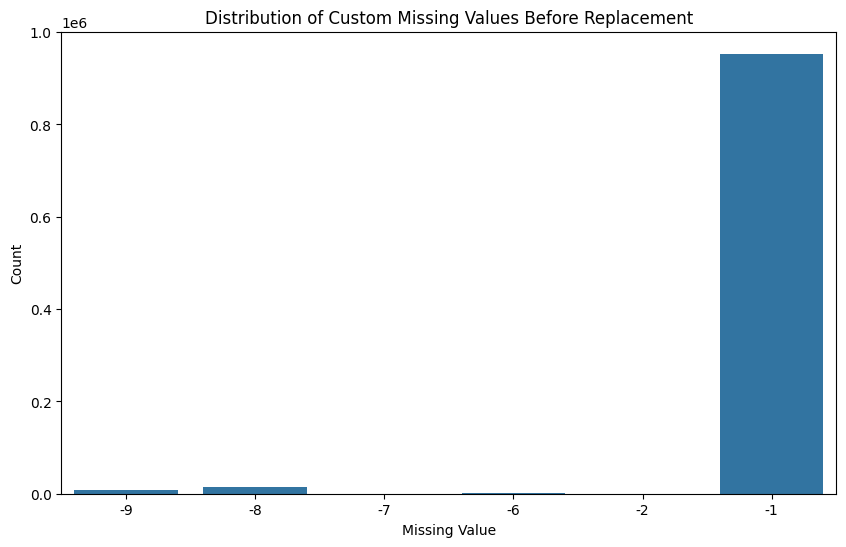

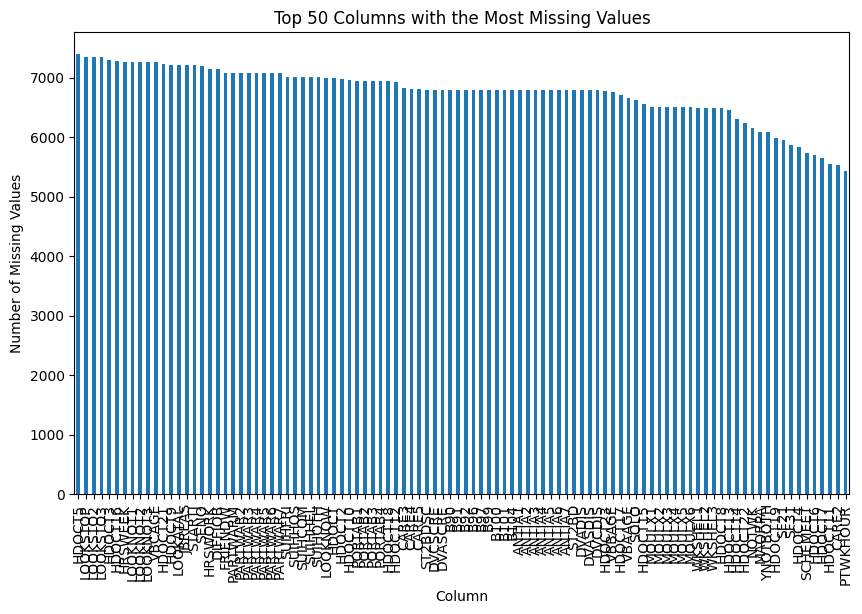

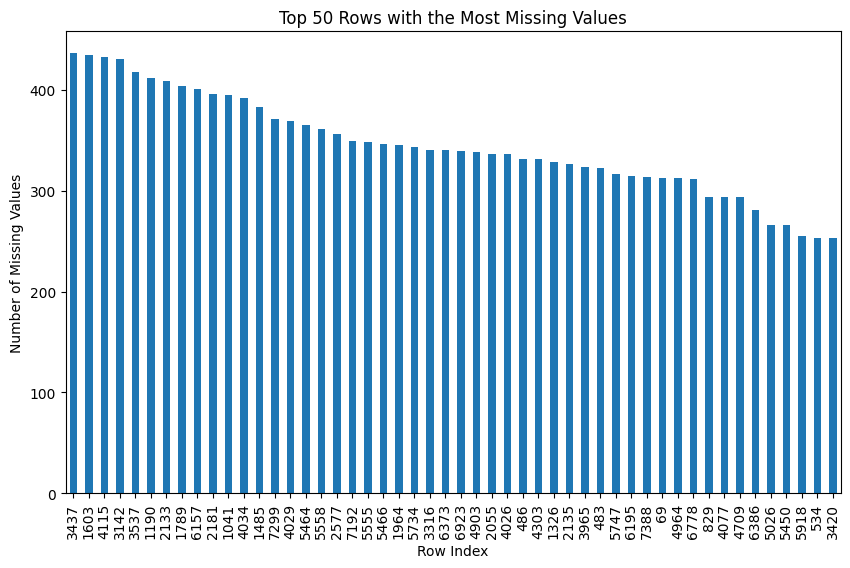

In [8]:

missing_values = [-1, -2, -6, -7, -8, -9]

missing_counts_before = {val: (dataset_1 == val).sum().sum() for val in missing_values}
missing_percentages_before = {val: (count / dataset_1.size) * 100 for val, count in missing_counts_before.items()}

missing_info_before = pd.DataFrame({
    'Missing Value': list(missing_counts_before.keys()),
    'Count': list(missing_counts_before.values()),
    'Percentage': list(missing_percentages_before.values())
})

missing_info_before_str = "\nDistribution of custom missing values before replacement:\n" + missing_info_before.to_string()

# Replacing missing values with np.nan
dataset_1.replace(missing_values, np.nan, inplace=True)

total_missing = dataset_1.isnull().sum().sum()

missing_counts = dataset_1.isnull().sum()
missing_percentages = (missing_counts / len(dataset_1)) * 100

top_50_columns = missing_counts.nlargest(100)

missing_per_row = dataset_1.isnull().sum(axis=1)

top_50_rows = missing_per_row.nlargest(50)

total_missing_str = f"Total missing values: {total_missing}\n"
top_50_columns_str = "\nTop 50 columns with the most missing values:\n" + top_50_columns.to_string()
top_50_rows_str = "\nTop 50 rows with the most missing values:\n" + top_50_rows.to_string()

output_str = (
    missing_info_before_str + "\n\n" +
    total_missing_str + "\n" +
    top_50_columns_str + "\n\n" +
    top_50_rows_str
)

with open("missing_values_summary.txt", "w") as file:
    file.write(output_str)

In [9]:

missing_percentages = dataset_1.isnull().mean() * 100

# classify columns based on the percentage of missing values
valid_columns = missing_percentages[missing_percentages < 20].index.tolist()
problematic_columns = missing_percentages[(missing_percentages >= 20) & (missing_percentages <= 50)].index.tolist()
highly_missing_columns = missing_percentages[missing_percentages > 50].index.tolist()


with open("missing_values_evaluation.txt", "w") as file:
    file.write("Columns with less than 20% missing values (valid for analysis):\n")
    file.write(', '.join(valid_columns) + "\n\n")
    file.write("Columns with 20% to 50% missing values (consider imputation or exclusion):\n")
    file.write(', '.join(problematic_columns) + "\n\n")
    file.write("Columns with more than 50% missing values (consider exclusion):\n")
    file.write(', '.join(highly_missing_columns) + "\n")


In [10]:

# list of columns to drop
columns_to_drop = [
    "YEARJBL", "PTWKHOUR", "DVLASTWK", "HRSWEEK", "ST2BDSC", "DVCSCRE", "DVASCRE", "VBAAGE", "VBBAGE", "VBCAGE", "LLORD", 
    "JBREAS", "LOOKED", "YINACT", "NOTWK", "HRSWORK", "HRPSOC2B", "YNOTBOTH", "MAORPA", "SEXORI", "SEXPART", "SEXDES", 
    "SEXPART2", "FURN", "SENO", "SF21", "SF31", "CARE2", "CARE3", "CARE4", "CARE5", "B90", "B91", "B92", "B96", "B97", 
    "B99", "B100", "B101", "B104", "ANTIA1", "ANTIA2", "ANTIA3", "ANTIA4", "ANTIA5", "ANTIA6", "ANTIA7", "ERI3", "ERI5", 
    "ERI6", "ERI7", "ERI9", "ERI13", "MOULX1", "MOULX2", "MOULX3", "MOULX4", "MOULX5", "MOULX6", "PORTAB1", "PORTAB2", 
    "PORTAB3", "PORTAB4", "PARTWARM", "PARTWAR2", "PARTWAR3", "PARTWAR4", "PARTWAR5", "PARTWAR6", "PARTWAR7", "FRIENDW", 
    "SCHEMEET", "JBAWAY", "OWNBUS", "RELBUS", "STARTJ", "EVERWK", "SOLO", "WKSHEL1", "WKSHEL2", "WKSHEL3", "LOOKNOW", 
    "LOOKATAL", "LOOKNOT1", "LOOKNOT2", "LOOKNOT3", "LOOKSTOP", "LOOKSTO2", "LOOKSTO3", "DIFFJOB", "HDOCT", "HDOCT2", 
    "HDOCT3", "HDOCT4", "HDOCT5", "HDOCT6", "HDOCT7", "HDOCT8", "HDOCT9", "HDOCT10", "HDOCT11", "HDOCT12", "HDOCT13", 
    "HDOCT14", "HDOCT15", "HDOCT16", "HDOCT17", "HDOCT18", "HDOCT19", "HDOCT20", "HDOCT21", "HDOCT22", "HDOCT23", 
    "SUIHFRI", "SUIHHOS", "SUIHCOM", "SUIHHEL", "SUIHOTH", "ST2BD", "DVADIS", "DVASDIS", "DVCDIS", "MATERN1", "MATERN2", 
    "MATERN3"
]

dataset_1.drop(columns=columns_to_drop, inplace=True)

dataset_1.to_csv('Data2.csv', index=False)

print(dataset_1.shape)


(7403, 491)


In [12]:

#  threshold for the maximum allowable percentage of missing values per row
threshold = 0.30

num_cols = dataset_1.shape[1]
max_missing_per_row = threshold * num_cols

# Drop rows with more than 30% missing values
data_clean = dataset_1.dropna(thresh=num_cols - max_missing_per_row)

data_clean.to_csv('Data3.csv', index=False)

print(data_clean.shape)


(7355, 491)


In [13]:
# Initialize the ImputationKernel
kernel = mf.ImputationKernel(
    data_clean,
    save_all_iterations=True,
    random_state=42
)

# Run the MICE algorithm for 5 iterations
kernel.mice(5)

# Save each imputed dataset to a separate CSV file
for i in range(5):
    imputed_dataset = kernel.complete_data(iteration=i)
    imputed_df = pd.DataFrame(imputed_dataset)
    imputed_df.to_csv(f'imputed_dataset_iteration_{i}.csv', index=False)

final_imputed_dataset = kernel.complete_data() 
final_imputed_df = pd.DataFrame(final_imputed_dataset)
final_imputed_df.to_csv('final_imputed_dataset.csv', index=False)

print("All imputed datasets have been saved.")


All imputed datasets have been saved.


### Encoding

In [103]:
df = pd.read_csv('final_imputed_dataset.csv') 

nominal_columns = [ "TEN1",  "NEWTEN", "HHDTYPE", "RESMARDF", "EDQUAL5", "DVILO3A", "DVILO4A", "SOC2000B", "NSSEC", "NSSECR", "SEG",
                "SC", "SIC2003B", "ETHNIC5", "ETHNIC4", "WHATREL", "GOR06", "TRTMENT", "DRUGDEP2"]

df_encoded = pd.get_dummies(df, columns=nominal_columns, dtype=int, drop_first=True)
df_encoded.to_csv('EncodedNominal.csv', index=False)

### Recursive Feature Elimination

In [39]:

features = df_encoded.drop(columns=['SMOKER', 'WT_INTS1'])
target = df_encoded['SMOKER']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

rf_model = RandomForestClassifier(n_estimators=100, random_state=0, class_weight='balanced')

rfe = RFE(estimator=rf_model, n_features_to_select=150, step=1)

rfe.fit(X_train, y_train)

selected_features = features.columns[rfe.support_]

selected_features_df = pd.DataFrame(selected_features, columns=["Selected Features"])
selected_features_df.to_csv('selected_features.csv', index=False)

data_selected = df_encoded[selected_features].copy()


### Multicollinearity check

In [42]:
# Function to calculate VIF
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Feature"] = features.columns
    vif["VIF Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    return vif

vif_df = calculate_vif(data_selected)

# Identify features with VIF higher than 10
high_vif_features = vif_df[vif_df["VIF Factor"] > 10]["Feature"].tolist()

with open('high_vif_features.txt', 'w') as file:
    for feature in high_vif_features:
        file.write(feature + '\n')

vif_df.to_csv('vif_values.csv', index=False)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
high_vif_drop = ["NUMADULT", "NUMCHILD", "RESAGE", "MCCLEM", "DVTOTSC", "DVADHD1", "PTSDRE", "PTSDAR", "IQVBEST2", "AGE20YR",
                "BMIGP4", "CISRSEVN", "AUDITGP", "IQVB2GP", "DRNKPROB", "DRUGDEP", "TEN1_4.0"]

data_selected.drop(columns=high_vif_drop, inplace=True)

In [62]:
vif_df2 = calculate_vif(data_selected)

high_vif_features2 = vif_df2[vif_df2["VIF Factor"] > 10]["Feature"].tolist()

with open('high_vif_features2.txt', 'w') as file:
    for feature in high_vif_features2:
        file.write(feature + '\n')

vif_df2.to_csv('vif_values2.csv', index=False)

In [69]:
#WORK RELATED STRESS
pos = ['ERI1', 'ERI2', 'ERI10', 'ERI11', 'ERI14', 'ERI15']
neg = ['ERI4', 'ERI8A', 'ERI8B', 'ERI8C', 'ERI12', 'JCQ1', 'JCQ2', 'JCQ3', 'JCQ4', 'JCQ5', 'JCQ6']

data_selected['WORKSTRESSSCORE'] = data_selected[neg].sum(axis=1) - data_selected[pos].sum(axis=1)

In [ ]:


new_drop = [ "BMI", "SEPBED", "DVADHD3", "PRAYNUM", "EQVINC3", 'SF9', 'SF10', 'SF11', 'FULLIFE', 'WORN', "AUDSAD2", "REALHME", "MOVE",
            "LITTER", "GRAFFIT", "PROPCLOS", "LEISURE", "ERI1", "ERI4", "ERI10", "ERI11", "ERI14", "ERI15", "JCQ2", "JCQ3", "JCQ4", "JCQ5", "JCQ6",
            "SFQB", "SFQD", "SFQE", "CANNEVER", "AMPHEVER", "COCAEVER", "ECSTEVER", "DRUGEVER", "BOTHMAPA", "MANAGE", "MAJORT16", "SPECREL", 
            'ERI1', 'ERI2', 'ERI10', 'ERI11', 'ERI14', 'ERI15','ERI4', 'ERI8A', 'ERI8B', 'ERI8C', 'ERI12', 'JCQ1', 'JCQ2', 'JCQ3', 'JCQ4', 'JCQ5', 'JCQ6',
            "VB", "VC", "HBEN"]

data_selected.drop(columns=new_drop, inplace=True )


In [77]:
vif_df3 = calculate_vif(data_selected)

high_vif_features3 = vif_df3[vif_df3["VIF Factor"] > 10]["Feature"].tolist()

with open('high_vif_features3.txt', 'w') as file:
    for feature in high_vif_features3:
        file.write(feature + '\n')


vif_df3.to_csv('vif_values3.csv', index=False)

In [81]:
new_drop1 = ["DVJ4", "RSTRONG", "TIRED", "SF12", "GREEN", "HWLONG", "COMGRP", "SFQG", 
            "DLSS1", "TENURE", "CIGWKGP", "ANYCHILD", "VF", "BORROW5"]
data_selected.drop(columns=new_drop1, inplace=True )


In [82]:
vif_df4 = calculate_vif(data_selected)

high_vif_features4 = vif_df4[vif_df4["VIF Factor"] > 10]["Feature"].tolist()

with open('high_vif_features4.txt', 'w') as file:
    for feature in high_vif_features4:
        file.write(feature + '\n')

vif_df4.to_csv('vif_values4.csv', index=False)

In [83]:
new_drop2 = ["AGE10YR", "EQVINC5", "SF1", "HAPPY", "BMIGP6", "CISRSIX", "AUDSAD3", "IQVBEST3G", "INDEBT16", "DRUGDEP2_3.0"]
data_selected.drop(columns=new_drop2, inplace=True )

In [85]:
vif_df5 = calculate_vif(data_selected)

high_vif_features5 = vif_df5[vif_df5["VIF Factor"] > 10]["Feature"].tolist()

with open('high_vif_features5.txt', 'w') as file:
    for feature in high_vif_features5:
        file.write(feature + '\n')

vif_df5.to_csv('vif_values5.csv', index=False)

In [86]:
data_selected.shape

(7355, 61)

### Defining the dataset

In [136]:
features = data_selected.drop(columns="CIGWEEK")
target = df_encoded['SMOKER'].map({1: 1, 2: 0}) 
sample_weights = df_encoded['WT_INTS1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, weights_train, weights_test = train_test_split(features, target, sample_weights, test_size=0.2, random_state=0, stratify=target)


#### Running the models on synthetic dataset 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters Log Reg:  {'logisticregression__C': 0.01, 'logisticregression__l1_ratio': 0.5}
Best Parameters RF:  {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}
Best Parameters XGB:  {'xgbclassifier__colsample_bytree': 0.8, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__max_depth': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__subsample': 0.8}
Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      1137
           1       0.83      0.01      0.03       334

    accuracy                           0.78      1471
   macro avg       0.80      0.51      0.45      1471
weighted avg       0.79      0.78      0.68      1471

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.81      0.9

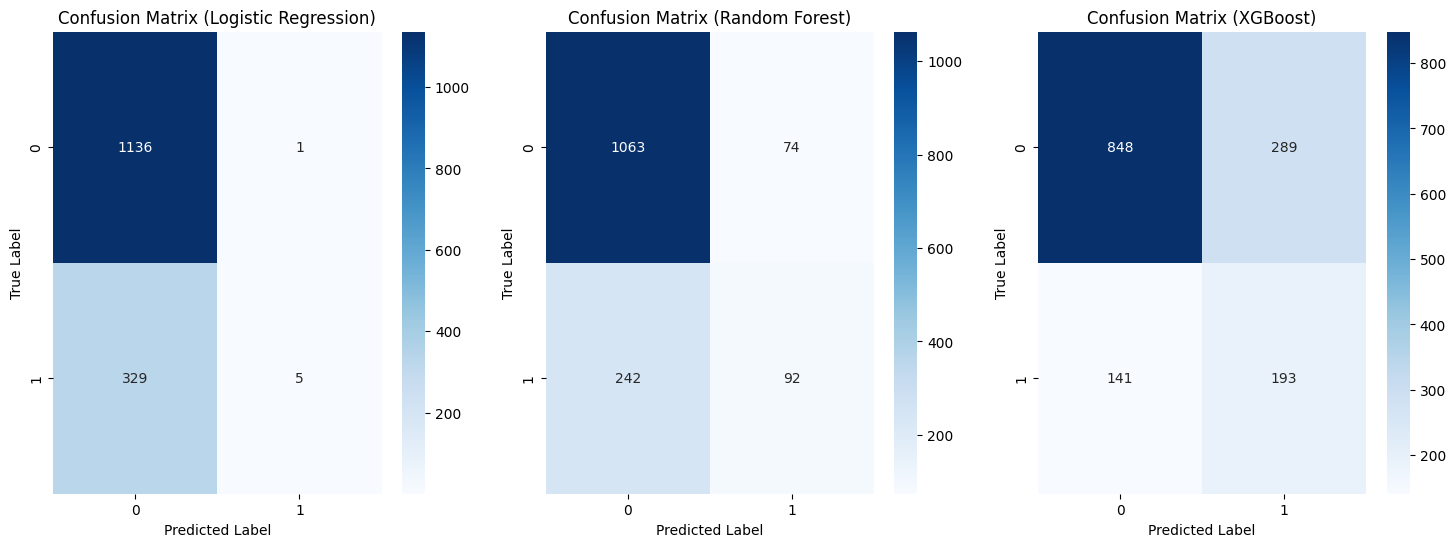

In [142]:
# parameter grids for each model
param_grid_log_reg = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]  # l1_ratio is used to balance L1 and L2 penalty
}

param_grid_rf = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_depth': [10, 20, None],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'xgbclassifier__n_estimators': [100, 200],
    'xgbclassifier__max_depth': [10, 20, None],
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__subsample': [0.8, 1.0],
    'xgbclassifier__colsample_bytree': [0.8, 1.0]
}

# models
log_reg = LogisticRegression(solver='saga', max_iter=10000, penalty='elasticnet', class_weight='balanced', random_state=0)
rf = RandomForestClassifier(class_weight='balanced', random_state=0)
xgb_model = xgb.XGBClassifier(scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]), random_state=0)

# pipelines
pipeline_log_reg = make_pipeline(
    SMOTE(sampling_strategy='auto', random_state=0), 
    log_reg
)

pipeline_rf = make_pipeline(
    SMOTE(sampling_strategy='auto', random_state=0), 
    rf
)

pipeline_xgb = make_pipeline(
    SMOTE(sampling_strategy='auto', random_state=0), 
    xgb_model
)

# Grid Search with Cross-Validation for each model
grid_search_log_reg = GridSearchCV(pipeline_log_reg, param_grid_log_reg, cv=5, scoring='f1', n_jobs=-1)
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1)

# Fit the models
grid_search_log_reg.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Get best estimators
best_log_reg = grid_search_log_reg.best_estimator_
best_rf = grid_search_rf.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test set for each model
y_pred_log_reg = best_log_reg.predict(X_test)
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)

best_params_log_reg = grid_search_log_reg.best_params_
best_params_rf = grid_search_rf.best_params_
best_params_xgb = grid_search_xgb.best_params_

print("Best Parameters Log Reg: ", best_params_log_reg)
print("Best Parameters RF: ", best_params_rf)
print("Best Parameters XGB: ", best_params_xgb)


# classification reports
print("Classification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

#  plot confusion matrices
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (Logistic Regression)')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (Random Forest)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Confusion Matrix (XGBoost)')
axes[2].set_xlabel('Predicted Label')
axes[2].set_ylabel('True Label')

plt.show()


In [144]:
# Feature importance for Logistic Regression
coef_log_reg = best_log_reg.named_steps['logisticregression'].coef_[0]
feature_names = features.columns
feature_importance_log_reg = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coef_log_reg)}).sort_values(by='Importance', ascending=False)

# Feature importance for Random Forest
feature_importance_rf = pd.DataFrame({'Feature': feature_names, 'Importance': best_rf.named_steps['randomforestclassifier'].feature_importances_}).sort_values(by='Importance', ascending=False)

# Feature importance for XGBoost
feature_importance_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': best_xgb.named_steps['xgbclassifier'].feature_importances_}).sort_values(by='Importance', ascending=False)


print("Top 20 Feature Importances (Logistic Regression):\n", feature_importance_log_reg.head(20))
print("\nTop 20 Feature Importances (Random Forest):\n", feature_importance_rf.head(20))
print("\nTop 20 Feature Importances (XGBoost):\n", feature_importance_xgb.head(20))


feature_importance_log_reg.head(20).to_csv('feature_importance_log_reg.csv', index=False)
feature_importance_rf.head(20).to_csv('feature_importance_rf.csv', index=False)
feature_importance_xgb.head(20).to_csv('feature_importance_xgb.csv', index=False)

Top 20 Feature Importances (Logistic Regression):
             Feature  Importance
59  WORKSTRESSSCORE    0.000293
15         DVAUDIT1    0.000239
16          SADQCSC    0.000101
18          PRIMGRP    0.000087
21          IMPPRAC    0.000075
22             QIMD    0.000069
25             DIAG    0.000061
28            TRUST    0.000059
31         RESIDENT    0.000052
34             SFQC    0.000050
13          DVTOTAL    0.000043
14          PTSDCOM    0.000043
29            ENJOY    0.000042
32         GOLIBRAR    0.000041
27           BELONG    0.000038
17          NOCHILD    0.000032
24          CONHOMD    0.000029
26          DVADHD2    0.000028
36             SFQH    0.000026
43           NOCLUB    0.000025

Top 20 Feature Importances (Random Forest):
      Feature  Importance
43    NOCLUB    0.116627
34      SFQC    0.104857
37    RELIG1    0.056104
38    RELIG3    0.055912
31  RESIDENT    0.040778
44  TRAUMA15    0.031585
29     ENJOY    0.028573
28     TRUST    0.028213
49   I